### Before start, please replace every folder path

https://github.molgen.mpg.de/MPIBR-Bioinformatics/pymol-install

In [1]:
import pandas as pd
import numpy as np
import copy
from math import *
import os
import random
from collections import defaultdict
import csv
from functools import reduce
from copy import deepcopy
import pickle
from timeit import default_timer as timer
from matplotlib import pyplot as plt
from ase import Atoms
from ase.io import read
from ase.io import write
from ase.visualize import view
import itertools

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
folder_path = 'CHA_36'

In [4]:
%run helper_functions.py

#### Read lat.in

In [5]:
filepath=folder_path+'/lat.in'
lattice = read_lat_in(filepath)

#### Run corrdump, generate clusters.out

In [6]:
#need to change path and max atom distance before running the following command
!corrdump -l=CHA_36/lat.in -cf=CHA_36/clusters.out -2=6.2 -3=6.2

Unable to open structure file


#### Read clusters.out

In [1]:
%run helper_functions.py

In [8]:
filepath = folder_path+'/clusters.out'
cluster_out_lines = read_clusters_out(filepath)

In [9]:
lat_clusters = break_down_cluster_out_lines(cluster_out_lines, lattice)

In [ ]:
#need to change path before running the following command
!mkdir CHA_36/lattice_clusters
!mkdir CHA_36/lattice_clusters/xyzs
!mkdir CHA_36/lattice_clusters/images

In [11]:
str_vec = [0 for i in range(len(lat_clusters['lat_vis_sites'].index))]
visualize_str_no_rep(lat_clusters['lat_vis_sites'], str_vec, folder_path+'/lattice_clusters/xyzs/all_sites.xyz', folder_path+'/lattice_clusters/images/all_sites.png')

In [12]:
#visualize all clusters
nsite =3
for i in range(1, int(lat_clusters['type_number'][nsite])+1):
    str_vec = [0 for i in range(len(lat_clusters['lat_vis_sites'].index))]
    sites = lat_clusters['{}-{}'.format(nsite, i)]['eg_pair_frac']
    uvwmax = find_max_uvw_from_cluster_frac(lattice_axes_abc(lattice), sites)
    for site in sites:
        index = find_df_index_frac(site, lat_clusters['lat_vis_sites'])
        str_vec[index] = 1
    xyz_filepath = folder_path+'/lattice_clusters/xyzs/cluster-{}-{}.xyz'.format(nsite, i)
    png_filepath = folder_path+'/lattice_clusters/images/cluster-{}-{}.png'.format(nsite, i)
    visualize_str_no_rep(lat_clusters['lat_vis_sites'], str_vec, xyz_filepath, png_filepath, uvwmax)

In [111]:
cluster_type = '2-6'
c= read(folder_path+'/lattice_clusters/xyzs/cluster-{}.xyz'.format(cluster_type))
view(c)

In [108]:
cluster_type = '2-11'
c= read(folder_path+'/lattice_clusters/xyzs/cluster-{}.xyz'.format(cluster_type))
view(c)

In [109]:
cluster_type = '3-6'
c= read(folder_path+'/lattice_clusters/xyzs/cluster-{}.xyz'.format(cluster_type))
view(c)

#### read str_dim.txt

In [17]:
%run helper_functions.py

In [18]:
filepath = folder_path+'/str_dim.txt'
structure = read_str_dim(filepath, lattice)

In [20]:
filepath = folder_path+'/str.out'
prepare_str_out(structure, filepath)

In [23]:
#need to change path before running the following command
if os.path.isfile('CHA_36/cluster_list.csv'):
    os.remove('CHA_36/cluster_list.csv')
    
!corrdump -l=CHA_36/lat.in -s=CHA_36/str.out -cf=CHA_36/clusters.out -2=6.2 -3=6.2 >> CHA_36/cluster_list.csv

#### read cluster list

In [50]:
%run helper_functions.py

In [51]:
filepath = folder_path+'/cluster_list.csv'
str_clusters = read_cluster_list(filepath, structure, lat_clusters)

In [ ]:
break_down_cluster_list(str_clusters, structure)

In [33]:
#need to change path before running the following command
!mkdir CHA_36/structure_clusters_rep
!mkdir CHA_36/structure_clusters_rep/xyzs
!mkdir CHA_36/structure_clusters_rep/images

In [34]:
#need to change path before running the following command
!mkdir CHA_36/structure_clusters_no_rep
!mkdir CHA_36/structure_clusters_no_rep/xyzs
!mkdir CHA_36/structure_clusters_no_rep/images

In [69]:
visualize_structure_one_cluster_type_all_examples(str_clusters, structure, folder_path, '2-7')
visualize_structure_one_cluster_type_all_examples(str_clusters, structure, folder_path, '2-11')
visualize_structure_one_cluster_type_all_examples(str_clusters, structure, folder_path, '3-6')

In [112]:
cluster = '2-7-1'
c= read(folder_path+'/structure_clusters_rep/xyzs/cluster-{}.xyz'.format(cluster))
view(c)

In [ ]:
#visualize_structure_all_clusters(str_clusters, structure, folder_path, rep='y')

#### pair sites for structure sites

In [58]:
%run helper_functions.py

In [59]:
str_clusters.keys()

dict_keys(['cluster_orig_list', 'type_number', 'cluster_types', '1-1', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '2-8', '2-9', '2-10', '2-11', '3-1', '3-2', '3-3', '3-4', '3-5', '3-6', '3-7', '3-8', '3-9', '3-10', '3-11', '3-12', '3-13', '3-14', '3-15', '3-16', 'mult_vis_range', 'str_vis_sites'])

In [60]:
add_cluster_list_site_index(str_clusters,structure)

In [61]:
add_pair_sites(structure, str_clusters)

#### count clusters for a given configuration

In [48]:
%run helper_functions.py

In [63]:
str_vec = [1 for i in range(len(structure['str_sites'].index))]

In [64]:
counting_types = []

In [ ]:
count_clusters_str_config(str_vec, structure, str_clusters, counting_types)

In [66]:
count_clusters_str_config(str_vec, structure, str_clusters, counting_types=['2-7','2-11'], excluding_types=['3-6'])

defaultdict(int, {'2-11': 18, '2-7': 0})

#### random generate one structure configuration

In [88]:
%run helper_functions.py

In [89]:
#need to change path before running the following command
!mkdir CHA_36/random_config_process
!mkdir CHA_36/random_config_process/xyzs
!mkdir CHA_36/random_config_process/images

mkdir: CHA_36/random_config_process: File exists
mkdir: CHA_36/random_config_process/xyzs: File exists
mkdir: CHA_36/random_config_process/images: File exists


In [117]:
penalty = {}
Al_num = 12
str_vec = random_config_hybrid(structure, str_clusters, Al_num, penalty, vis=1, folder_path=folder_path, max_try = 100)
cal_penalty(str_vec, structure, str_clusters, penalty)

0

In [118]:
c= read(folder_path+'/random_config_process/xyzs/select-{}.xyz'.format(Al_num))
view(c)

In [119]:
penalty = {'2-1':1, '2-2':1, '2-3':1,'2-4':1}
Al_num = 12
str_vec = random_config_hybrid(structure, str_clusters, 12, penalty, vis=1, folder_path=folder_path, max_try = 100)
cal_penalty(str_vec, structure, str_clusters, penalty)

0

In [121]:
c= read(folder_path+'/random_config_process/xyzs/select-{}.xyz'.format(Al_num))
view(c)

#### titrate clusters for one structure configuration

In [149]:
%run helper_functions.py

In [150]:
cluster_type_dict = prepare_cluster_type_dict(str_clusters)

In [151]:
penalty

{'2-1': 1, '2-2': 1, '2-3': 1, '2-4': 1}

In [159]:
str_vec = random_config_hybrid(structure, str_clusters, 340, penalty, max_try = 100)

In [160]:
np.sum(str_vec)

340

In [161]:
cal_penalty(str_vec,structure, str_clusters, penalty)

0

In [162]:
d1 = titrate_config_one_group(str_vec, structure, str_clusters, cluster_type_dict, counting_types=['2-7','2-11'],excluding_types=['3-6'])

In [163]:
d2 = titrate_config_multi_groups(str_vec, structure, str_clusters, cluster_type_dict, counting_groups=[['2-7','2-11']], excluding_types=['3-6'], repeat_num = 10)

In [164]:
d2['2-7']

[60, 60, 60, 60, 60, 60, 60, 60, 60, 60]

In [165]:
d2['2-11']

[47, 47, 47, 47, 47, 47, 47, 47, 47, 47]

#### generate multiple random structure configurations for one compositions

In [166]:
#need to change path before running the following command
!mkdir CHA_36/random_configs
!mkdir CHA_36/random_configs/xyzs
!mkdir CHA_36/random_configs/images

mkdir: CHA/random_configs: File exists
mkdir: CHA/random_configs/xyzs: File exists
mkdir: CHA/random_configs/images: File exists


In [167]:
%run helper_functions.py

In [186]:
str_vecs = random_config_mult(structure, str_clusters, 250, penalty, 10, vis=1, folder_path=folder_path, max_try = 100)

In [ ]:
c= read(folder_path+'/random_configs/images/config-9.xyz')
view(c)

## CHA_36

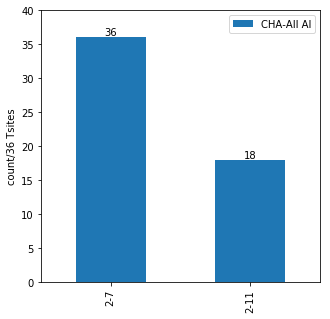

In [86]:
counting_types = ['2-7', '2-11']
values = [36, 18]
value_series = pd.Series.from_array(values)
x_labels = counting_types

# now to plot the figure...
plt.figure(figsize=(5, 5))
ax = value_series.plot(kind='bar')
ax.set_ylabel('count/36 Tsites')
ax.set_xticklabels(x_labels)
ax.legend(['CHA-All Al'])
rects = ax.patches

# Now make some labels
labels = ['{:.0f}'.format(x) for x in values]
plt.ylim([0,40])

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

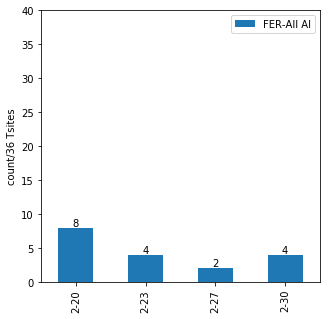

In [87]:
counting_types = ['2-20', '2-23', '2-27', '2-30']
values = [8, 4, 2, 4]

value_series = pd.Series.from_array(values)
x_labels = counting_types


# now to plot the figure...
plt.figure(figsize=(5, 5))
ax = value_series.plot(kind='bar')
ax.set_ylabel('count/36 Tsites')
ax.set_xticklabels(x_labels)

ax.legend(['FER-All Al'])
rects = ax.patches

# Now make some labels
labels = ['{:.0f}'.format(x) for x in values]
plt.ylim([0,40])

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')



#### count clusters for multiple configurations

In [169]:
%run helper_functions.py

In [188]:
count_results = count_clusters_multi_configs(str_vecs, structure, str_clusters, counting_types=['2-7','2-11'],excluding_types=['3-6'])

#### titrate clusters for multiple configurations

In [172]:
%run helper_functions.py

In [194]:
titrate_clusters = titrate_clusters_multi_configs(str_vecs, structure, str_clusters, cluster_type_dict, counting_groups=[['2-7', '2-11']], excluding_types=['3-6'], titrate_num=1)

#### count for all Al

In [269]:
%run helper_functions.py

In [249]:
str_vecs = random_config_mult(structure, str_clusters, 972, penalty={}, config_num=1, max_try = 100)

In [ ]:
#count for all Al
counting_types = ['2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '2-8', '2-9', '2-10', '2-11']

all_al_count_result = count_clusters_multi_configs(str_vecs, structure, str_clusters, counting_types=counting_types)
values1 = [np.mean(all_al_count_result[t])/972 for t in counting_types]
errors1 = [np.std(all_al_count_result[t]) for t in counting_types]

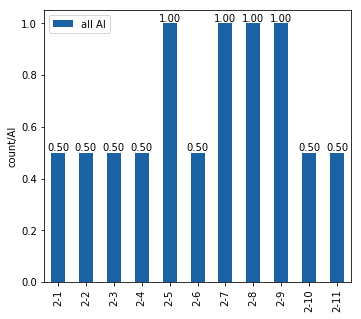

In [270]:
plot_one_bar_chart(folder_path+'/all_al_count.png',counting_types, values1, ylabel='count/Al', label='all Al')

#### rules(no 1NN) vs no rules

In [271]:
penalty

{'2-1': 1, '2-2': 1, '2-3': 1, '2-4': 1}

In [274]:
#str_vecs_no_1NN = random_config_mult(structure, str_clusters, 190, penalty=penalty, config_num=100, max_try = 100)

In [275]:
#str_vecs_no_rules = random_config_mult(structure, str_clusters, 190, penalty={}, config_num=100, max_try = 100)

In [276]:
#count_results_no_1NN = count_clusters_multi_configs(str_vecs_no_1NN, structure, str_clusters, counting_types=counting_types)

In [278]:
#count_results_no_rules = count_clusters_multi_configs(str_vecs_no_rules, structure, str_clusters, counting_types=counting_types)

In [286]:
count_results_no_rules_values = [np.mean(count_results_no_rules[t])/190 for t in counting_types]
count_results_no_rules_errors = [np.std(count_results_no_rules[t])/190 for t in counting_types]
count_results_no_1NN_values = [np.mean(count_results_no_1NN[t])/190 for t in counting_types]
count_results_no_1NN_errors = [np.std(count_results_no_1NN[t])/190 for t in counting_types]

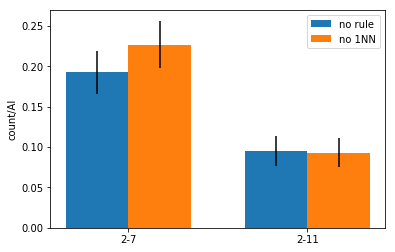

In [368]:
plot_two_bar_charts(folder_path+'/rules vs no rules.png', counting_types, values1=count_results_no_rules_values, values2=count_results_no_1NN_values, errors1=count_results_no_rules_errors, errors2=count_results_no_1NN_errors, ylabel='count/Al', label1='no rule', label2='no 1NN')

#### count vs titrate

In [288]:
counting_types = ['2-7', '2-11']

In [ ]:
#titrate_result = titrate_clusters_multi_configs(str_vecs_no_rules, structure, str_clusters, cluster_type_dict, counting_groups=[['2-7', '2-11']], titrate_num=100)

In [295]:
titrate_values = [np.mean(titrate_result[t])/190 for t in counting_types]
titrate_errors = [np.std(titrate_result[t])/190 for t in counting_types]

In [296]:
titrate_values

[0.14235736842105262, 0.06612842105263159]

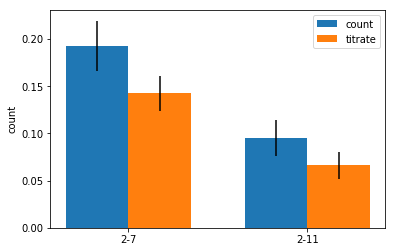

In [297]:
plot_two_bar_charts(folder_path+'/count vs titrate.png', counting_types, values1=count_results_no_rules_values, values2=titrate_values, errors1=count_results_no_rules_errors, errors2=titrate_errors, ylabel='count', label1='count', label2='titrate')

#### composition

In [335]:
Si_Al_ratios = [3, 5, 7, 10, 15, 20, 25, 30, 35, 40]
Al_ratios = [1/(1+x) for x in Si_Al_ratios]
Al_nums = [int(Al_ratio*len(structure['str_sites'][structure['str_sites'].multi_atoms == True].index)) for Al_ratio in Al_ratios]

In [336]:
Al_nums

[243, 162, 121, 88, 60, 46, 37, 31, 27, 23]

In [310]:
filename = folder_path+'/jobs/titrate_results_{}.p'.format(1)
titrate_result = pickle.load(open(filename, 'rb'))

In [314]:
(np.mean(titrate_result['2-7']) + np.mean(titrate_result['2-11']))/277

0.3276173285198556

In [350]:
filename = folder_path+'/jobs/titrate_results_1.p'.format(i+1)
titrate_result = pickle.load(open(filename, 'rb'))

In [357]:
values_new = []
errors_new = []
for i in range(10):
    filename = folder_path+'/jobs/titrate_results_{}.p'.format(i+1)
    titrate_result = pickle.load(open(filename, 'rb'))
    t = [(titrate_result['2-7'][j] + titrate_result['2-11'][j])/Al_nums[i] for j in range(len(titrate_result['2-7']))]
    values_new.append(np.mean(t))
    errors_new.append(np.std(t))

In [358]:
values_new

[0.30559670781893006,
 0.2312962962962963,
 0.1776859504132231,
 0.12897727272727275,
 0.09600000000000002,
 0.07217391304347825,
 0.06027027027027028,
 0.04580645161290322,
 0.03851851851851853,
 0.034782608695652174]

In [359]:
errors_new

[0.02078592634942683,
 0.02243476886070497,
 0.026355733420003264,
 0.02903292338873004,
 0.029918407563089167,
 0.033237417136724165,
 0.035000782627167694,
 0.03231607686804695,
 0.03587816603944395,
 0.03689252771408075]

In [360]:
mean_errors_new = [x/10 for x in errors_new]

In [319]:
Si_Al_ratios_Chris = [3, 5, 7, 10, 15, 20, 25, 30, 35, 40]

In [318]:
values_Chris = [0.269, 0.229, 0.18, 0.141, 0.089,0.0596,0.0524,0.0482,0.0398, 0.0344]

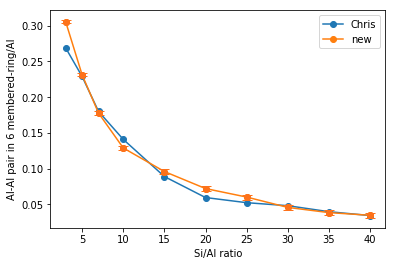

In [367]:
plt.plot(Si_Al_ratios_Chris, values_Chris,label='Chris', marker='o')
plt.plot(Si_Al_ratios, values_new, label='new', marker='o')
plt.errorbar(Si_Al_ratios, values_new, yerr=mean_errors_new, fmt='o', capsize=5, color='#FD721B')
plt.legend()
plt.xlabel('Si/Al ratio')
plt.ylabel('Al-Al pair in 6 membered-ring/Al');

#### jobs

In [197]:
import pickle

In [222]:
pickle.dump(lattice, open(folder_path+'/jobs/lattice.p','wb'))

In [223]:
pickle.dump(structure, open(folder_path+'/jobs/structure.p','wb'))

In [224]:
pickle.dump(lat_clusters, open(folder_path+'/jobs/lat_clusters.p','wb'))
pickle.dump(str_clusters, open(folder_path+'/jobs/str_clusters.p','wb'))

In [219]:
pickle.dump(penalty, open('penalty.p', 'wb'))

In [355]:
py_template = '''import pandas as pd
import numpy as np
import copy
from math import *
import os
import random
from collections import defaultdict
import csv
from functools import reduce
from copy import deepcopy
import pickle
from timeit import default_timer as timer
from matplotlib import pyplot as plt
from ase import Atoms
from ase.io import read
from ase.io import write
from ase.visualize import view
import itertools

from helper_functions import *

lattice = pickle.load(open('lattice.p','rb'))
structure = pickle.load(open('structure.p','rb'))
lat_clusters = pickle.load(open('lat_clusters.p','rb'))
str_clusters = pickle.load(open('str_clusters.p','rb'))
penalty = pickle.load(open('penalty.p','rb'))
Al_num = {0}
cluster_type_dict = prepare_cluster_type_dict(str_clusters)

str_vecs = random_config_mult(structure, str_clusters, Al_num, penalty, 100, max_try = 1000)
titrate_results = titrate_clusters_multi_configs(str_vecs, structure, str_clusters, cluster_type_dict, counting_groups=[['2-7', '2-11']], excluding_types=['3-6'], titrate_num=1)
pickle.dump(dict(titrate_results), open('titrate_results_{1}.p', 'wb'))
'''

In [356]:
Al_nums

[243, 162, 121, 88, 60, 46, 37, 31, 27, 23]

In [352]:
for i, ratio in enumerate(Si_Al_ratios):
    filename = folder_path+'/jobs/J{}.py'.format(i+1)
    if os.path.isfile(filename):
        os.remove(filename)
    with open(filename, 'a') as file:
        file.write(py_template.format(Al_nums[i], i+1))

In [353]:
qscript_template = '''#!/bin/bash
#$ -q *@@crc
#$ -pe smp 2
python J{}.py
'''

In [354]:
for i, ratio in enumerate(Si_Al_ratios):
    filename = folder_path+'/jobs/J{}.sh'.format(i+1)
    if os.path.isfile(filename):
        os.remove(filename)
    with open(filename, 'a') as file:
        file.write(qscript_template.format(i+1))

In [ ]:
titrate_results = []

In [ ]:
for i in range(1):
    filename = folder_path+'/jobs/titrate_results_{}.p'.format(i+1)
    titrate_result = pickle.load(open(filename, 'rb'))
    tirate_results.append(titrate_result)

In [232]:
titrate_results

[]

In [ ]:
titrate_results_1 = pickle